# Семинар 21
# Метод штрафов и модифицированной функции Лагранжа

## На прошлом семинаре

- Методы внутренней точки
- Метод внутренних барьеров (логарифмических)
- Прямо-двойственный метод

## Метод внешних штрафов

**Идея:** если внутренние штрафы (барьеры) предотвращали выход точки из множества, то внешние штрафы существенно увеличивают целевую функцию при выходе точки из множества, но позволяют этому случиться.

## Задача с ограничениями-равенствами

\begin{equation*}
\begin{split}
& \min f(x)\\
\text{s.t. } & g_i(x) = 0, \; i=1,\ldots,m
\end{split}
\end{equation*}

### Квадратичная штрафная функция
Исходную задачу можно преобразовать к задаче безусловной оптимизации
$$
\min_x Q(x, \mu),
$$
где 

$$
Q(x, \mu) = f(x) + \frac{\mu}{2}\sum\limits_{i=1}^mg^2_i(x), \quad \mu > 0
$$
- Если ограничение не выполняется, то значение целевой функции увеличивается пропорционально парамеру $\mu$
- При увеличении параметра $\mu$, решение задачи всё точнее и точнее удовлетворяет ограничениям

### Общая схема

```python
def QudraticPenaltyEquality(Q, gradQ, x0, get_mu, get_tau, **kwargs):
    while True:
        # Stop when norm of gradient of Q is less than current tau
        x = MinimizeQ(Q, gradQ, x0, get_tau)
        if global_cnvergence(x, Q, **kwargs):
            break
        mu = get_mu()
        Q, gradQ = UpdateQ(mu)
        x0 = UpdateStartPoint(x, Q)
    return x
```

- Параметр $\mu$ нужно изменять в зависимости от сложности решения подзадачи: если известно, что задача решается долго, то $\mu$ нужно увеличивать плавно, например $\mu_{k+1} = 2\mu_k$. Eсли подзадача решается быстро, то допустимо более резкое увеличение $\mu$: $\mu_{k+1} = 15\mu_k$.
- При увеличении $\mu$ решение подзадачи становится сложнее из-за плохой обусловленности гессиана. Об этом подробнее ниже.

### Сходимость

**Теорема 1.** Пусть для каждого $\mu$ безусловная задача имеет конечное глобальное решение. Тогда предельная точка последовательности решений безусловных задач при $\mu \to \infty$ является глобальным решением исходной задачи.

- Проблема: глобальный оптимум для каждой подзадачи не всегда может быть достигнут!

**Теорема 2.** Пусть $\tau_k \to 0$ и $\mu_k \to \infty$ и $\| Q'(x^*_k, \mu_k) \| \leq \tau_k$. Тогда 
- если $x^*_k \to x^*$ и $x^*$ - недопустима, то $x^*$ стационарная точка функции $\| g(x) \|^2_2$;
- если $x^*$ - допустима и градиенты ограничений в этой точке линейно независимы, тогда $x^*$ - точка, в которой выполнены KKT.

Для любой подпоследовательности $x^*_k \to x^*, \; k \in \mathcal{C}$ выполнено
$$
\lim_{k \in \mathcal{C}} \mu_k g_i(x_k) = \lambda_i^*
$$
для всех $i = 1,\ldots,m$, где $\lambda_i^*$ множители Лагранжа, удовлетсворяющие ККТ.

### Вырожденность гессиана

**Пример.**
\begin{equation*}
\begin{split}
& \min -5x_1^2 + x_2^2\\
\text{s.t. }& x_1 = 1
\end{split}
\end{equation*}
Штрафная функция примет вид
$$
Q(x, \mu) = -5x_1^2 + x_2^2 + \frac{\mu}{2}(x_1 - 1)^2
$$
**Наблюдение** При $\mu < 10$ функция $Q(x, \mu)$ неограничена снизу по $x$, и подзадача не имеет конечного решения

### Общий вид гессиана
$$
Q''(x, \mu) = f''(x) + \mu\sum_{i=1}^m g_i(x) g''_i(x) + \mu(g'(x))^{\top} g'(x),
$$
где $g'(x)$ - якобиан вектор-функции ограничений-равенств.

Около точки минимума в силу теоремы 2 справедливо следующее приближение
$$
Q''(x, \mu) \approx L''(x, \lambda^*) + \mu(g'(x))^{\top} g'(x)
$$

- гессиан лагранжиана не зависит от $\mu$
- произведение $(g'(x))^{\top} g'(x)$ ранга $m \ll n$

**Итог:** некоторые собственные значения гессиана $Q''(x, \mu)$ имеют порядок $\mu$, что приводит к вырожденности при увеличении $\mu$

**Следствие:** поиск направления в методе Ньютона очень неточный

### Как искать направление в методе Ньютона?

$$
Q''(x_k, \mu)p = -Q'(x_k, \mu)
$$

Введём новую переменную $\xi = \mu g'(x) p$ и запишем эту систему в виде
$$\begin{bmatrix} f''(x) + \mu \sum\limits_{i=1}^m g_i(x)g_i''(x) & g'(x)\\ (g'(x))^{\top} & -\frac{1}{\mu} I \end{bmatrix} = \begin{bmatrix} -Q'(x, \mu) \\ 0 \end{bmatrix}$$

- Обусловленность этой системы уже не растёт с ростом $\mu$
- Размерность увеличилась на $m$
- Проблема неадекватности квадратичной аппроксимации остаётся

## Задача с ограничениями типа равенств и неравенств

\begin{equation*}
\begin{split}
& \min_x f(x)\\
\text{s.t. } & g_i(x) = 0, \; i=1,\ldots,m \\
& h_j(x) \leq 0, \; j = 1,\ldots,p
\end{split}
\end{equation*}

### Штрафная функция

$$
\min_x f(x) + \frac{\mu}{2}\sum\limits_{i=1}^mg^2_i(x) + \frac{\mu}{2}\sum\limits_{j=1}^p (\max(0, h_j(x)))^2,
$$
где $\mu > 0$
- Отличие от задачи без ограничений-неравенств: вторая производная штрафной функции разрывна и, как следствие, штрафная функция уже не дважды непрерывно дифференцируема

## Pro & Contra

Pro

- автоматический способ превращения произвольной задачи *условной* оптимизации в задачу *безусловной* оптимизации
- начальную точку искать не надо
- часто ограничения "не строгие" и допустимо незначительное нарушение ограничений
- простота реализации общей схемы

Contra

- решение задачи безусловной оптимизации не всегда является решением исходной задачи
- если целевая функция определена только на допустимом множестве, то метод внешних штрафов не применим
- квадратичная аппроксимация $Q(x, \mu)$ может быть неадекватной

## Метод модифицированной функции Лагранжа
**Мотивация:** для метода штрафных функций решения подзадач могут нарушать ограничения, и известно только, что
$$
g_i(x^*_k) \approx \frac{\lambda^*}{\mu_k} \to 0, \quad \mu_k \to \infty
$$
Можно ли изменить $Q(x, \mu)$ так, чтобы избежать этого нарушения ограничений?

**Идея:** добавлять штраф не к целевой функции, а к функции Лагранжа. Аналог прямо-двойственного метода, так как за одну итерацию происходит обновление как прямых, так и двойственных переменных

## Задача с ограничениями-равенствами

\begin{equation*}
\begin{split}
& \min f(x)\\
\text{s.t. } & g_i(x) = 0, \; i=1,\ldots,m
\end{split}
\end{equation*}

### Модифицированная функция Лагранжа
$$
M(x, \lambda, \mu) = f(x) + \sum\limits_{i=1}^m\lambda_i g_i(x) + \frac{\mu}{2}\sum\limits_{i=1}^mg^2_i(x)
$$

Необходимое условие минимума $M(x_k, \lambda^k, \mu_k)$
$$
f'(x_k) + \sum\limits_{i=1}^m (\lambda^k_i + \mu_k g_i(x_k) ) g'_i(x_k) \approx 0
$$
Отсюда получаем выражение для $\lambda^{k+1}$
$$
\lambda^{k+1}_i = \lambda^k_i + \mu_k g_i(x_k)
$$

### Нарушение ограничений

$$
g_i(x_k) \approx \frac{\lambda^*_i - \lambda^k_i}{\mu_k} \to 0
$$
- В методе штрафных функций сходимость к 0 была порядка $1/\mu_k$
- В методе модифицированной функции Лагранжа сходимость к 0 быстрее, поскольку не только знаменатель возрастает, но и числитель стремится к 0

## Задача с ограничениями типа равенства и неравенства
\begin{equation*}
\begin{split}
& \min_x f(x)\\
\text{s.t. } & g_i(x) = 0, \; i=1,\ldots,m \\
& h_j(x) \leq 0, \; j = 1,\ldots,p
\end{split}
\end{equation*}

### Модифицированная функция Лагранжа

$$
M(x, \mu, \lambda, \nu) = f(x) + \sum\limits_{i=1}^m \left[\lambda_ig_i(x) + \frac{\mu}{2}g^2_i(x)\right] + \frac{1}{2\mu}\sum\limits_{j=1}^p\left[ (\nu_j + \mu h_j(x))_+^2 - \nu^2_j \right],
$$
где $\lambda$ - двойственные переменные для ограничений-равенств, $\nu$ - двойственная переменная для ограничений-неравенств.
- Почему $M(x, \mu, \lambda, \nu)$ так выглядит, смотрите в лекциях

### Обновление двойственных переменных для неравенств
$$
\nu^{k+1}_j = (\nu^k_j + \mu_k h_j(x_k))_+
$$

### Общая схема 

1. Формируется функция $M$
2. По необходимым условиям находится выражение для $x_k(\lambda, \nu, \mu)$ и проверяется по достаточным условиям на минимум
3. Взятием предела по $\mu \to \infty$ при фиксированных двойственных переменных определяются прямые переменные, являющиеся решением исхожной задачи
4. Выражения для $x^k$ подставляются в выражения для $\lambda$ и $\nu$
5. Взятием предела по $\mu \to \infty$ определяются двойственные переменные для найденных оптимальных прямых переменных

### Сходимость

- Локальная сходимость при выборе начального приближения достаточно близко к минимуму по прямым и двойственным переменным
- Бесконечно увеличивать параметр $\mu$ не нужно: для некоторого достаточно большого $\mu$ решения вспомогательных задач гарантировано будут сходиться к решению исходной задачи
- Решение вспомогательных задач проще, чем в методе штрафов, так как параметр $\mu$ ограничен сверху

## Практические замечания

- Метод модифицированной функции Лагранжа предпочтительнее, поскольку решение подзадачи не сложнее, чем в методе штрафов, но сходимость более быстрая
- Метод штрафов становится предпочтительным как регуляризация в подходе *последовательного квадратичного программирования* ([SQP](https://en.wikipedia.org/wiki/Sequential_quadratic_programming))
- Пакеты [LACELOT](http://www.numerical.rl.ac.uk/lancelot/blurb.html) и [MINOS](https://en.wikipedia.org/wiki/MINOS_(optimization_software)) по-разному реализуют метод модифицированной функции Лагранжа
- В [статье](https://www.dropbox.com/s/rdqcn0fppumreto/MinosvsLancelot.pdf?dl=0) приведено сравнение этих пакетов, однако они оба разработаны в начале 90х и написаны на Fortran'e

### Эксперимент

Рассмотрим задачу
\begin{equation*}
\begin{split}
& \min \|x\|_2 \\
\text{s.t. } & Ax = b
\end{split}
\end{equation*}
 
и решим её методом модифицированной функции Лагранжа.

In [1]:
import cvxpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

num_iters = 10
mu = 1.0
n = 20
m = 10
A = np.random.randn(m, n)
b = np.random.randn(m, 1)

# Initialize problem
x = cvxpy.Variable(shape=(n, 1))
f = cvxpy.norm(x, 2)

# Solve with CVXPY.
cvxpy.Problem(cvxpy.Minimize(f), [A*x == b]).solve()
print ("Optimal value from CVXPY =", f.value)

Optimal value from CVXPY = 0.8530429535840249


In [2]:
# Solve with method of augmented Lagrangian
resid = A*x - b
y = cvxpy.Parameter(shape=(m, 1)) 
y.value = np.zeros((m, 1))
aug_lagr = f + y.T*resid + (mu/2.)*cvxpy.sum_squares(resid)
for t in range(num_iters):
    cvxpy.Problem(cvxpy.Minimize(aug_lagr)).solve()
    y.value += mu*resid.value

print("Optimal value from method of augmented Lagrangian =", f.value)

Optimal value from method of augmented Lagrangian = 0.8528664130580953


#### Зависимость сходимости от параметра $\mu$

In [3]:
mus = [0.1, 1, 10, 100]
conv_res = {}
conv_obj = {}
for mu in mus:
    conv_res[mu] = np.zeros(num_iters)
    conv_obj[mu] = np.zeros(num_iters)
    x = cvxpy.Variable(shape=(n, 1))
    f = cvxpy.norm(x, 2)
    resid = A*x - b
    y = cvxpy.Parameter(shape=(m, 1)) 
    y.value = np.zeros((m, 1))
    aug_lagr = f + y.T*resid + (mu/2.)*cvxpy.sum_squares(resid)
    for t in range(num_iters):
        cvxpy.Problem(cvxpy.Minimize(aug_lagr)).solve()
        y.value += mu*resid.value
        conv_res[mu][t] = np.linalg.norm(resid.value)
        conv_obj[mu][t] = aug_lagr.value

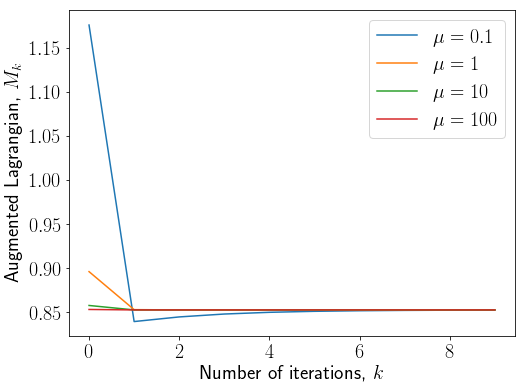

In [4]:
plt.figure(figsize=(8, 6))
fontsize=20
for mu in mus:
    plt.plot(conv_obj[mu], label=r"$\mu = {}$".format(mu))
plt.legend(fontsize=fontsize)
plt.xlabel("Number of iterations, $k$", fontsize=fontsize)
plt.ylabel("Augmented Lagrangian, $M_k$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

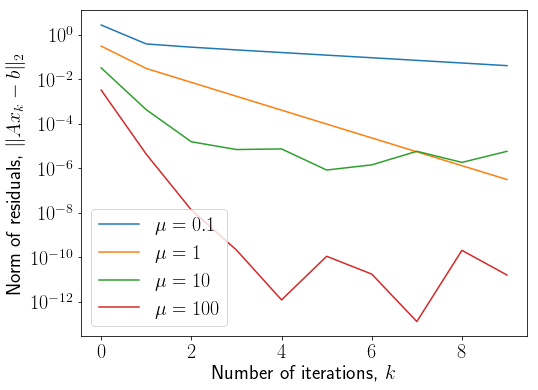

In [5]:
plt.figure(figsize=(8, 6))
fontsize=20
for mu in mus:
    plt.semilogy(conv_res[mu], label=r"$\mu = {}$".format(mu))
plt.legend(fontsize=fontsize)
plt.xlabel("Number of iterations, $k$", fontsize=fontsize)
plt.ylabel("Norm of residuals, $\|Ax_k - b\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

## Резюме

- Метод внешних штрафов
- Метод модифицированной функции Лагранжа